In [334]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4

c:\Users\acer\Downloads


In [335]:
DB = cnt.connect(
    host = "localhost",
    user = "root",
    password = "[]",
    port = 3317
)

C = DB.cursor()

In [ ]:
# Duomenų šaltinis: https://www.kaggle.com/datasets/joebeachcapital/world-happiness-report-2013-2023

# Tema: nagrinėti skirtingų laikotarpių "World Happiness Report" duomenys ir laimės indeksas (angl. Happiness rate). World Happiness ataskaitose pateikiama 
# informacija apie tai, kaip žmonės vertina savo gyvenimą daugiau nei iš 150 pasaulio šalių. Tam pasitelkiami šeši kintamieji, kurie lemia aukštesnį 
# gyvenimo kokybės vertinimą: vienam gyventojui tenkanti BVP dalis (ekonominis rodiklis, parodantis šalies ekonominį išsivystymo lygį), duomenys
# apie gyventojų sveikatą (sveiko gyvenimo trukmė) ir medicinos prieinamumą, socialinės pašalpos, asmeninės ir pilietinės laisvės, dosnumas ir korupcijos
# paplitimas. Šio baigiamojo darbo metu analizuoti trys rodikliai: GDP per capita, social support ir freedom to make life choices.

# Išskikelti klausimai/hipotezės:

# 1. Kurios šalys pagal laimės indekso rodiklį (angl. Happiness rate) 2023 metais buvo išrinktos kaip pačios laimingiausios/nelaimingiausios?
# Atsakant į 1 klausimą naudojamas CSV failas "WorldHappinessIndex2013_2023", nuskaitomas su Pandas.

# 2. Kokie rodikliai ir kaip įtakoja laimės indeksą? 
# 2.1. Ar BVP dydis (angl. GDP per capita) įtakoja laimės indeksą? 
# 2.2. Ar socialinės paramos (angl. Social support) dydis įtakoja laimės indeksą?
# 2.3. Ar pasirinkimų laisvės (angl. Freedom to make life choices) dydis įtakoja laimės indeksą?
# 2.4. Kokiose šalyse didžiausia gyvenimo trukmė, ar tos šalys sutampa su laimingiausiomis šalimis?
# Atsakant į 2.1.-2.4 klausimus naudotas CSV failas "World Happiness Report 2023", kuris buvo įkeltas į SQL sukurtą duomenų bazę pavadinimu "baigiamasis".

# 3. Kaip kito Lietuvos laimės indeksas 2018-2023 m. laikotarpiu?
# Atsakant į 3 klausimą naudoti 6 CSV failai "World Happiness Report [atitinkami metai]", nuskaitomi su Pandas. 

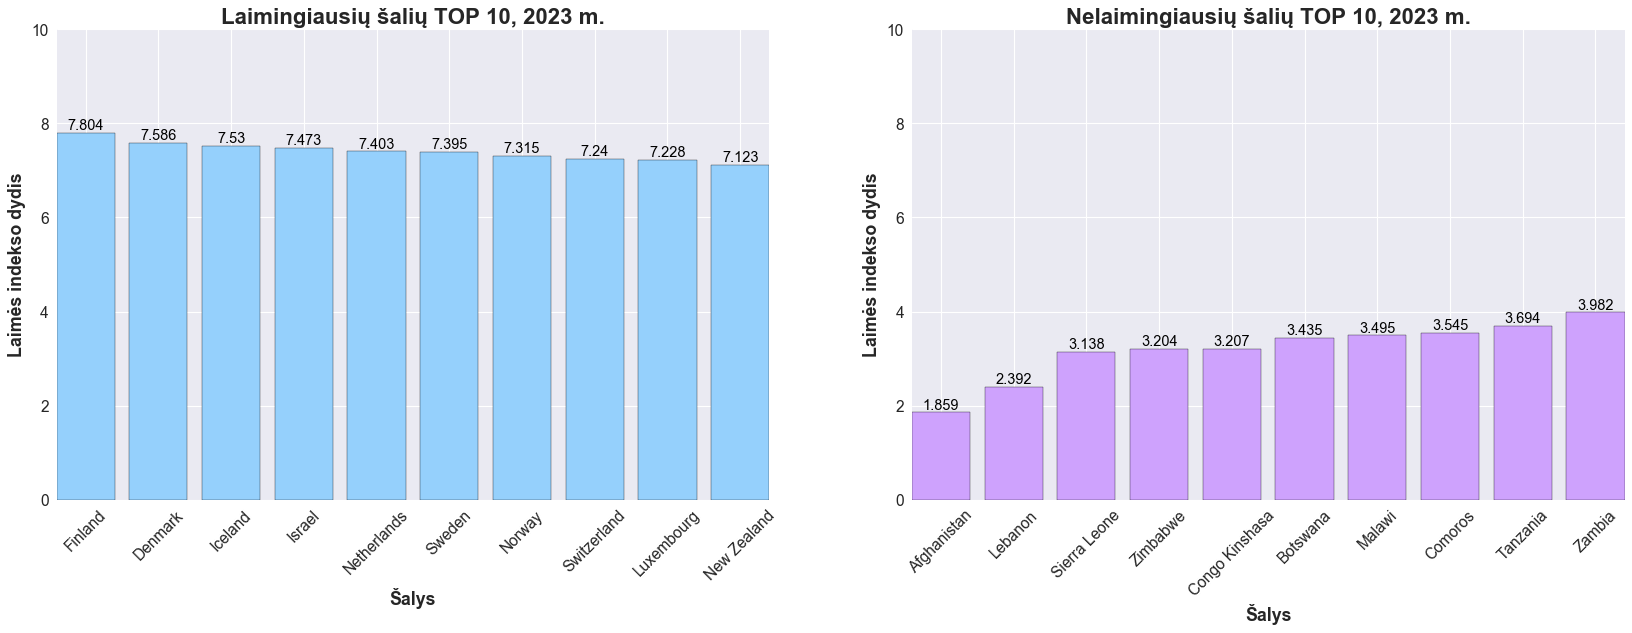

In [336]:
# 1. Kurios šalys pagal laimės indekso rodiklį (angl. Happiness rate) 2023 metais buvo išrinktos kaip pačios laimingiausios/nelaimingiausios?

li = pd.read_csv("WorldHappinessIndex2013_2023.csv")
li2 = li.dropna()

li2.columns = ["Šalis", "Metai", "Indeksas", "Pozicija"]
li2.head()

top10l= li2[li2["Metai"] == 2023].nlargest(10, "Indeksas").sort_values(by="Indeksas", ascending=False)
top10l.head(10)

top10n= li2[li2["Metai"] == 2023].nsmallest(10, "Indeksas").sort_values(by="Indeksas", ascending=True)
top10n.head(10)

# Vizualizacija:
plt.style.use("seaborn-v0_8")

fig, axis = plt.subplots(1,2, figsize=[20,6])

# plotting code:
x1 = top10l["Šalis"]
y1 = top10l["Indeksas"]

x2 = top10n["Šalis"]
y2 = top10n["Indeksas"]

colors1 = ["#95d0fc"]
colors2 = ["#cea2fd"]

P=axis[0].bar(x1, y1, color=colors1)
G=axis[1].bar(x2, y2, color=colors2)

axis[0].bar_label(P, color='black',fontsize=13)
axis[1].bar_label(G, color='black',fontsize=13)

axis[0].set_xlabel("Šalys", fontsize=16, fontdict={'fontsize':16, 'fontweight':'bold'})
axis[0].set_ylabel("Laimės indekso dydis", fontsize=16, fontdict={'fontsize':16, 'fontweight':'bold'})

axis[1].set_xlabel("Šalys", fontsize=16, fontdict={'fontsize':16, 'fontweight':'bold'})
axis[1].set_ylabel("Laimės indekso dydis", fontsize=16, fontdict={'fontsize':16, 'fontweight':'bold'})

axis[0].set_xticks(x1)
axis[0].set_xticklabels(x1, rotation=45)

axis[1].set_xticks(x2)
axis[1].set_xticklabels(x2, rotation=45)

axis[0].set_title("Laimingiausių šalių TOP 10, 2023 m.", fontsize=20, fontdict={'fontsize':20, 'fontweight':'bold'})
axis[1].set_title("Nelaimingiausių šalių TOP 10, 2023 m.", fontsize=20, fontdict={'fontsize':20, 'fontweight':'bold'})

axis[0].set_ylim([0, 10])
axis[1].set_ylim([0, 10])

axis[0].tick_params(axis="x", labelsize=14)
axis[0].tick_params(axis="y", labelsize=14)

axis[1].tick_params(axis="x", labelsize=14)
axis[1].tick_params(axis="y", labelsize=14)

plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_3024\3164379199.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  a = pd.read_sql_query(sql1, con=DB)
C:\Users\acer\AppData\Local\Temp\ipykernel_3024\3164379199.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  b = pd.read_sql_query(sql2, con=DB)
C:\Users\acer\AppData\Local\Temp\ipykernel_3024\3164379199.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  c = pd.read_sql_query(sql3, con=DB)


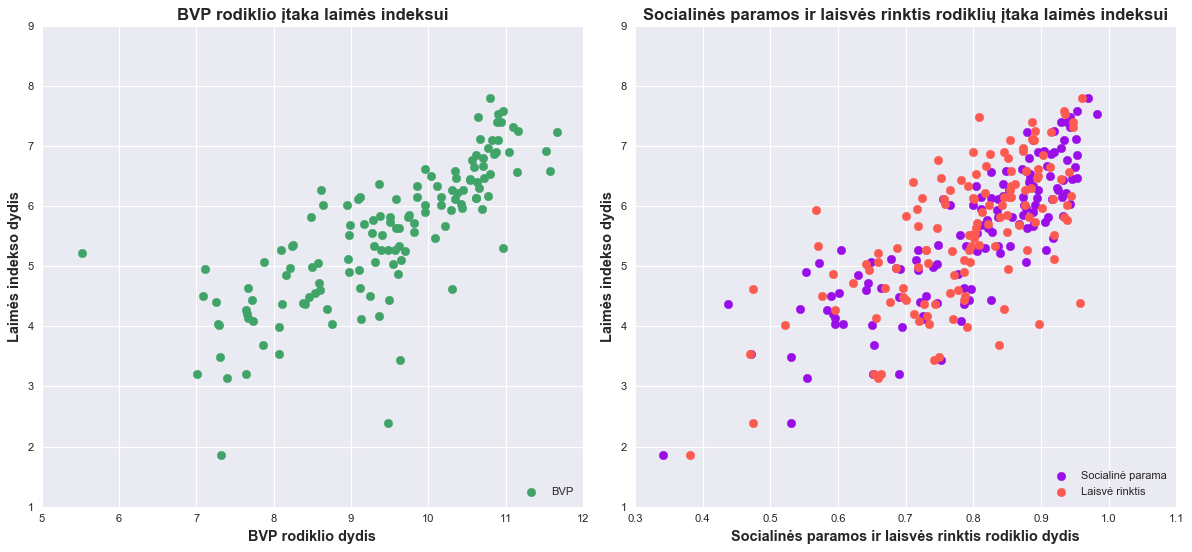

In [337]:
# 2. Kokie rodikliai ir kaip įtakoja laimės indeksą? Iš scatter grafikų matoma, kad BVP, socialinės paramos bei laisvės rinktis rodikliai 
# įtakoja laimės indeksą, kai jie aukštesni, tai laimės indekso rodiklis irgi didesnis. 

C.execute("use baigiamasis")

sql1="""select
	`Ladder score` as Indeksas,
    `Logged GDP per capita` as BVP
from
	world_happiness_report_2023"""

a = pd.read_sql_query(sql1, con=DB)
a.head()

sql2="""select
	`Ladder score` as Indeksas ,
    `Social support` as Socialinė_parama
from
	world_happiness_report_2023"""

b = pd.read_sql_query(sql2, con=DB)
b.head()

sql3="""select
	`Ladder score` as Indeksas ,
    `Freedom to make life choices` as Laisvė
from
	world_happiness_report_2023"""

c = pd.read_sql_query(sql3, con=DB)
c.head()

# Vizualizacija:
plt.style.use("seaborn-v0_8")

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7), gridspec_kw={'width_ratios':[1,1]})

#plotting code:
ax1.scatter(a["BVP"], a["Indeksas"], label="BVP", color="#40a368", s=60)
ax2.scatter(b["Socialinė_parama"], b["Indeksas"], label="Socialinė parama", color="#9a0eea", s=60) # norint, kad butu du scatteriai vienam grafike, cia pacioj pradzioj reikia ax1 irgi pasizymeti
ax2.scatter(c["Laisvė"], c["Indeksas"], label="Laisvė rinktis", color="#fc5a50", s=60)

ax1.set_xlabel("BVP rodiklio dydis", fontsize=13, fontdict={'fontsize':13, 'fontweight':'bold'})
ax1.set_ylabel("Laimės indekso dydis", fontsize=13, fontdict={'fontsize':13, 'fontweight':'bold'})

ax2.set_xlabel("Socialinės paramos ir laisvės rinktis rodiklio dydis", fontsize=13, fontdict={'fontsize':13, 'fontweight':'bold'})
ax2.set_ylabel("Laimės indekso dydis", fontsize=13, fontdict={'fontsize':13, 'fontweight':'bold'})

ax1.set_title("BVP rodiklio įtaka laimės indeksui", fontsize=15, fontdict={'fontsize':15, 'fontweight':'bold'})
ax2.set_title("Socialinės paramos ir laisvės rinktis rodiklių įtaka laimės indeksui", fontsize=15, fontdict={'fontsize':15, 'fontweight':'bold'})

ax1.legend(loc='lower right')
ax2.legend(loc='lower right')
ax1.ticklabel_format(style='plain')
ax2.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

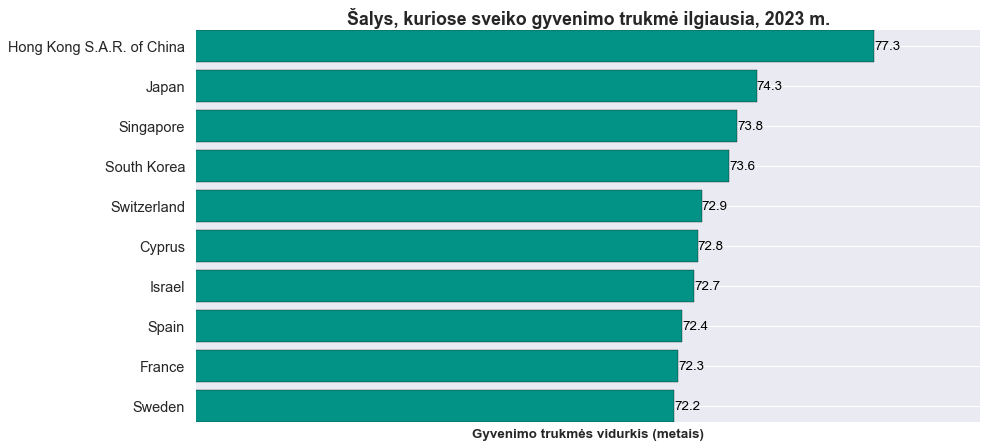

In [338]:
# 2.4. Kokiose šalyse didžiausia gyvenimo trukmė, ar tos šalys sutampa su laimingiausiomis šalimis? 
# Grafike matomos Šveicarija, Izraelis ir Švedija - jos taip pat yra ir laimingiausių šalių Top10-uke.

sql4="""select
	`Country name`,
    round(`Healthy life expectancy`,1)
from
	world_happiness_report_2023
order by
	`Healthy life expectancy` desc
limit 10"""

C.execute(sql4)
ats = C.fetchall()
# print(ats)

sal = []
tr = []

for eilute in ats:
	sal.append(eilute[0]),
	tr.append(eilute[1])

# Vizualizacija:
plt.style.use("seaborn-v0_8")

x = np.arange(0, len(tr))

fig, axis = plt.subplots(figsize=[10,5])

P= axis.barh(sal, tr, color="#029386")
axis.bar_label(P, color='black',fontsize=12)

axis.set_xticks([])
axis.set_xlim([60, 80])

axis.invert_yaxis()
axis.set_title("Šalys, kuriose sveiko gyvenimo trukmė ilgiausia, 2023 m.", fontsize=16, fontdict={'fontsize':16, 'fontweight':'bold'})

axis.xaxis.set_tick_params(pad = 10)
axis.yaxis.set_tick_params(pad = 10)

axis.set_xlabel("Gyvenimo trukmės vidurkis (metais)", fontsize=12, fontdict={'fontsize':12, 'fontweight':'bold'})

axis.tick_params(axis="x", labelsize=13)
axis.tick_params(axis="y", labelsize=13)

plt.show()

# Pastaba: į šį grafiką patenka šalys, kurios taip pat yra Top10-tuke lamingiausių šalių, tai - Šveicarija, Izraelis ir Švedija.

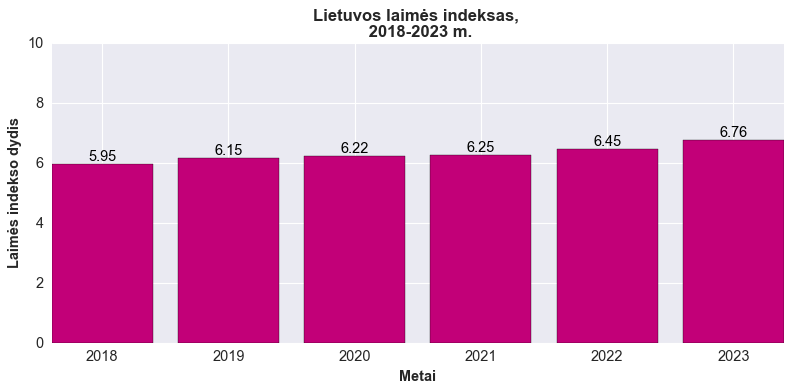

In [339]:
# 3. Kaip kito Lietuvos laimės indeksas 2018-2023 m. laikotarpiu?

WHR2018 = pd.read_csv("World Happiness Report 2018.csv")
WHR2019 = pd.read_csv("World Happiness Report 2019.csv")
WHR2020 = pd.read_csv("World Happiness Report 2020.csv")
WHR2021 = pd.read_csv("World Happiness Report 2021.csv")
WHR2022 = pd.read_csv("World Happiness Report 2022.csv")
WHR2023 = pd.read_csv("World Happiness Report 2023.csv")

lt18 = WHR2018.query("`Country or region` == 'Lithuania'")["Score"].values[0]
lt19 = WHR2019.query("`Country or region` == 'Lithuania'")["Score"].values[0]
lt20 = WHR2020.query("`Country name` == 'Lithuania'")["Ladder score"].values[0]
lt21 = WHR2021.query("`Country name` == 'Lithuania'")["Ladder score"].values[0]
lt22 = WHR2022.query("`Country` == 'Lithuania'")["Happiness score"].values[0]
lt23 = WHR2023.query("`Country name` == 'Lithuania'")["Ladder score"].values[0]

# Vizualizacija:
plt.style.use("seaborn-v0_8")

Metai = ["2018", "2019", "2020", "2021", "2022", "2023"]
Indeksas = [lt18, lt19, lt20, lt21, lt22, lt23]

fig, axis = plt.subplots(figsize=(10,5))
#plotting code:
K = axis.bar(Metai, Indeksas, color="#c20078")
axis.bar_label(K, color='black',fontsize=13, fmt="%.2f")
axis.set_xlabel('Metai', fontsize=13, fontdict={'fontsize':13, 'fontweight':'bold'})
axis.set_ylabel('Laimės indekso dydis', fontsize=13, fontdict={'fontsize':13, 'fontweight':'bold'})
axis.set_title('Lietuvos laimės indeksas, \n 2018-2023 m.', fontsize=15, fontdict={'fontsize':15, 'fontweight':'bold'})
axis.tick_params(axis='x', labelsize=13)
axis.tick_params(axis='y', labelsize=13)
axis.set_ylim([0, 10])
fig.tight_layout()
plt.show()